In [192]:
import pandas as pd 
import pickle 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [193]:
stats = pd.read_csv('part-00000-a839c6d4-e4d8-46ff-aedb-5aeb877960f5-c000.csv')
player = pd.read_csv('clean_players.csv')

In [194]:
data = stats.merge(player[['last_name']], left_on='player_id', right_on=player['id'], )

In [195]:
stats.head()

ast  blk  dreb  fg3a  fg3m  fg_pct  fga  fgm  fta  ftm  ...  \
0    4    0     1     2     0   0.250    4    1    4    4  ...   
1    4    0     2     0     0   0.500    6    3    2    1  ...   
2    2    1     4     6     1   0.385   13    5    2    2  ...   
3    5    2    17     0     0   0.353   17    6    6    3  ...   
4    2    0     4     0     0   0.500    2    1    4    3  ...   

   visitor_team_score  season  player_id  team_id  team_score  min_played  \
0                  92    2005       1564        5          91       16.85   
1                 105    2005       1624        2         105       36.00   
2                 101    2005       1534       19          88       29.20   
3                  93    2005        971       18          87       39.00   
4                  90    2005       1241       12          90       28.00   

        eFG%        TS%  oreb       PER  
0  25.000000  52.083333     0  0.652819  
1  50.000000  50.872093     0  0.444444  
2  42.307692  46.829971     1  0.753425  
3  35.294118  38.187373     4  1.910256  
4  50.000000  66.489362     5  1.178571  

[5 rows x 30 columns]

In [196]:
stats.columns

Index(['ast', 'blk', 'dreb', 'fg3a', 'fg3m', 'fg_pct', 'fga', 'fgm', 'fta',
       'ftm', 'id', 'pf', 'pts', 'reb', 'stl', 'turnover', 'game_id',
       'home_team_id', 'home_team_score', 'visitor_team_id',
       'visitor_team_score', 'season', 'player_id', 'team_id', 'team_score',
       'min_played', 'eFG%', 'TS%', 'oreb', 'PER'],
      dtype='object')

In [197]:
# stats.drop(['visitor_team_id', 'home_team_id', \
#             'game_id', 'player_id', 'team_id', 'season', 'id'], 1, inplace = True)

In [198]:
stats.drop(['eFG%', 'TS%', 'visitor_team_id', 'home_team_id', \
            'game_id', 'player_id', 'team_id', 'season', 'home_team_score',
       'visitor_team_score', 'fg_pct', 'id'], 1, inplace = True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_11360\1862184250.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  stats.drop(['eFG%', 'TS%', 'visitor_team_id', 'home_team_id', \


In [199]:
# stats.drop(['eFG%', 'TS%', 'visitor_team_id', 'home_team_id', \
#             'game_id', 'player_id', 'team_id', 'season', 'home_team_score',
#        'visitor_team_score', 'fg_pct', 'id', 'lg_ftm', 'lg_fta', 'lg_pf', 'team_FG', 'team_AST', 'avg_ast', 'DRB%',
#        'factor', 'VOP'], 1, inplace = True)

In [200]:
stats.head()

ast  blk  dreb  fg3a  fg3m  fga  fgm  fta  ftm  pf  pts  reb  stl  \
0    4    0     1     2     0    4    1    4    4   2    6    1    0   
1    4    0     2     0     0    6    3    2    1   5    7    2    3   
2    2    1     4     6     1   13    5    2    2   1   13    5    0   
3    5    2    17     0     0   17    6    6    3   2   15   21    4   
4    2    0     4     0     0    2    1    4    3   2    5    9    0   

   turnover  team_score  min_played  oreb       PER  
0         1          91       16.85     0  0.652819  
1         2         105       36.00     0  0.444444  
2         2          88       29.20     1  0.753425  
3         3          87       39.00     4  1.910256  
4         0          90       28.00     5  1.178571

In [201]:
stats.columns

Index(['ast', 'blk', 'dreb', 'fg3a', 'fg3m', 'fga', 'fgm', 'fta', 'ftm', 'pf',
       'pts', 'reb', 'stl', 'turnover', 'team_score', 'min_played', 'oreb',
       'PER'],
      dtype='object')

In [202]:
stats.columns

Index(['ast', 'blk', 'dreb', 'fg3a', 'fg3m', 'fga', 'fgm', 'fta', 'ftm', 'pf',
       'pts', 'reb', 'stl', 'turnover', 'team_score', 'min_played', 'oreb',
       'PER'],
      dtype='object')

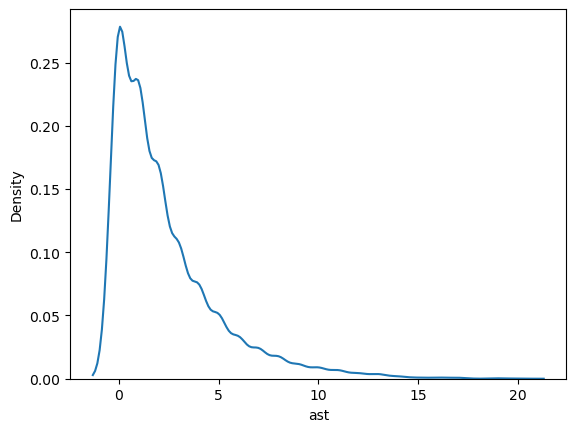

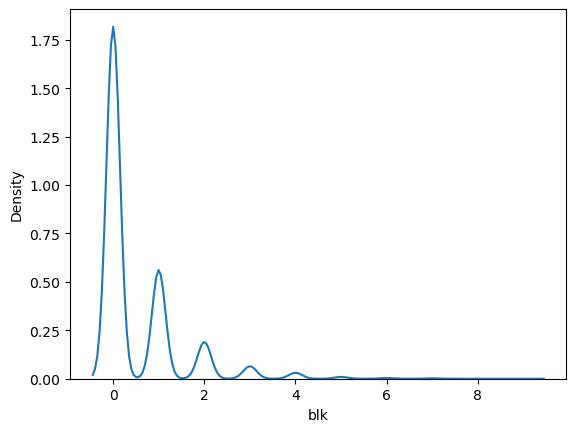

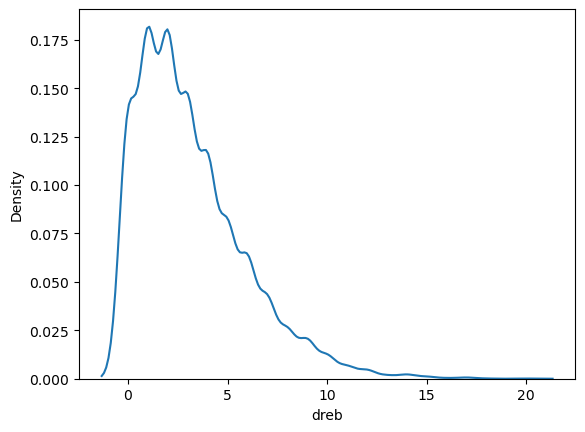

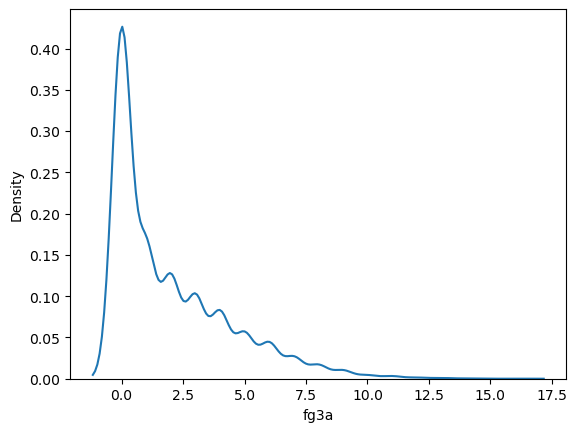

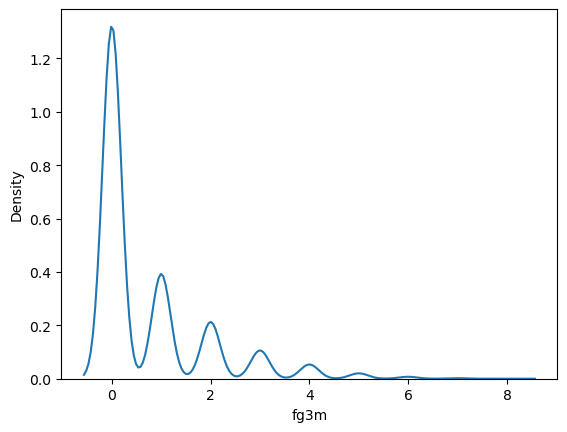

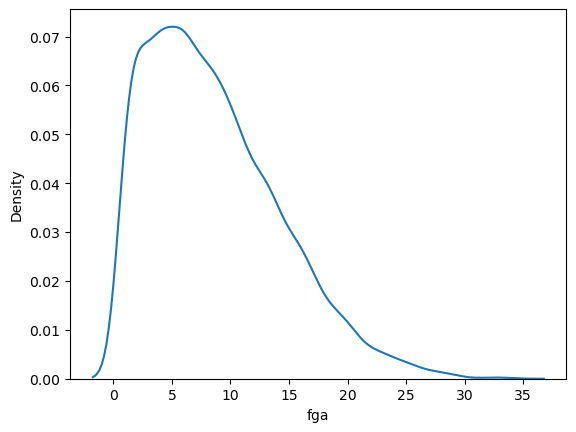

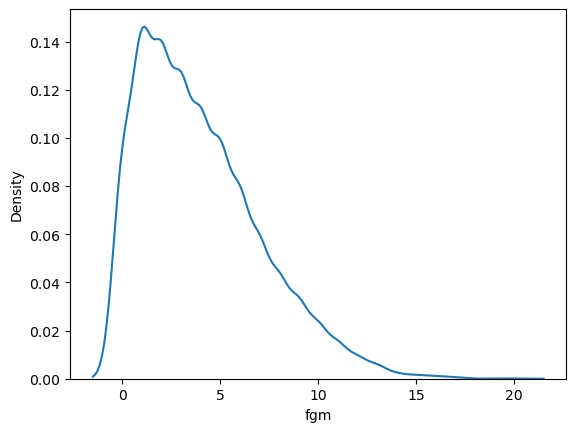

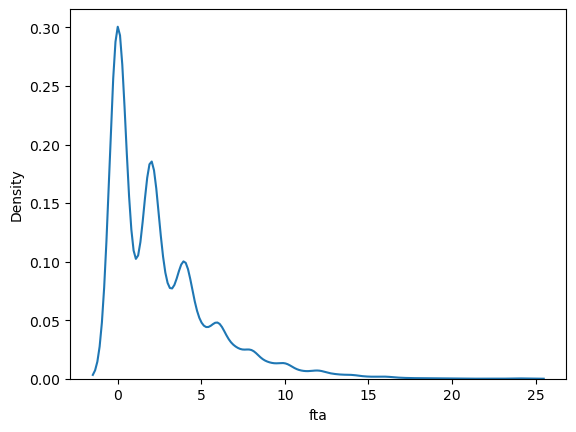

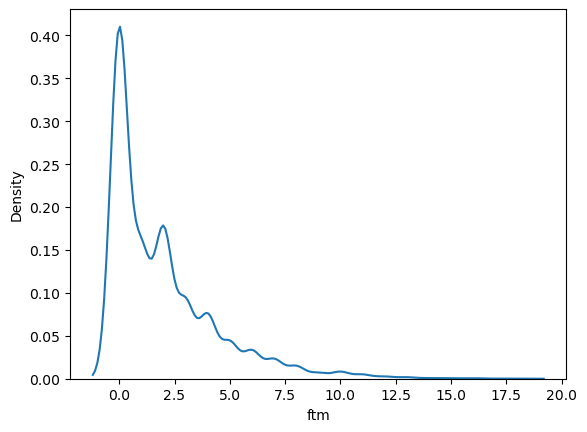

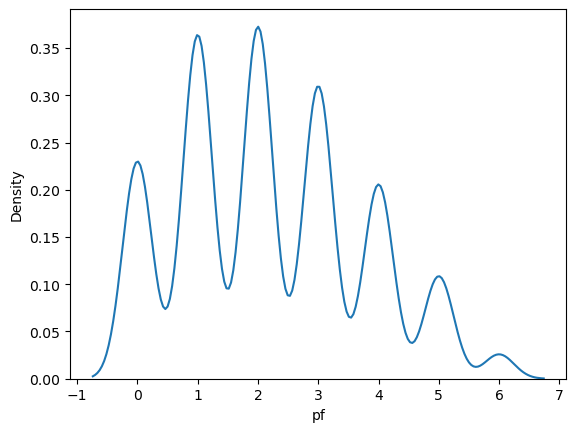

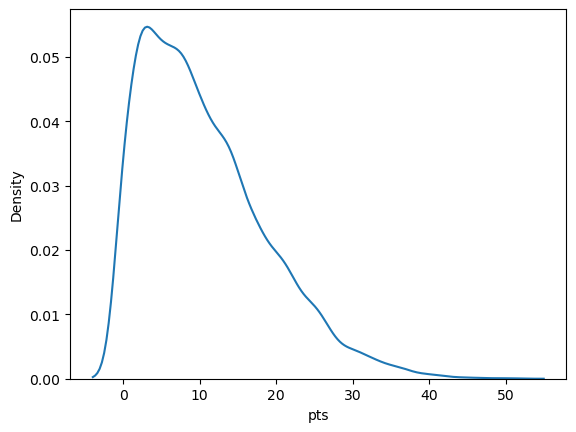

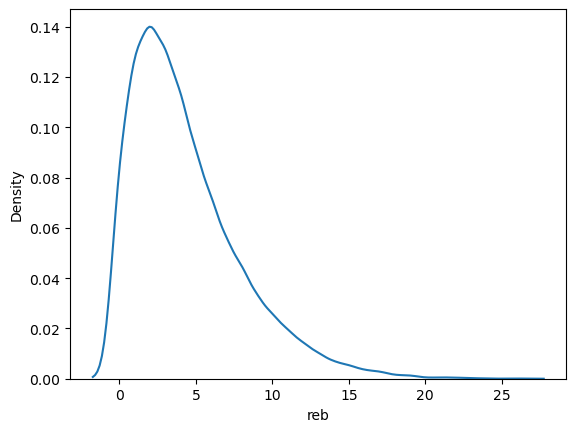

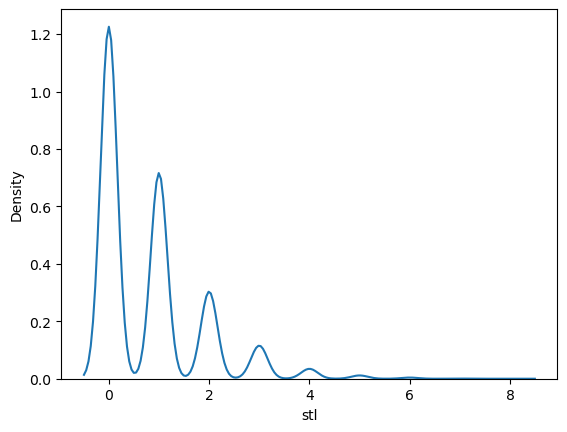

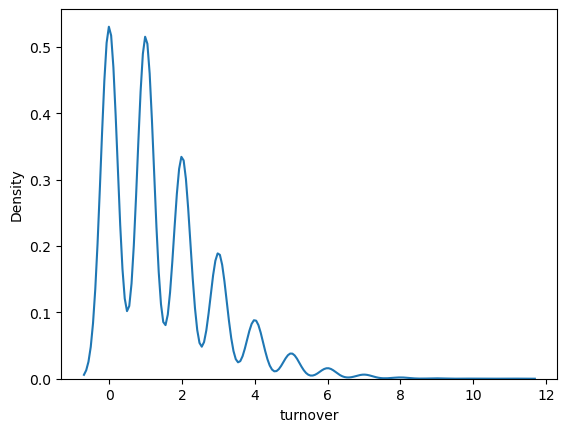

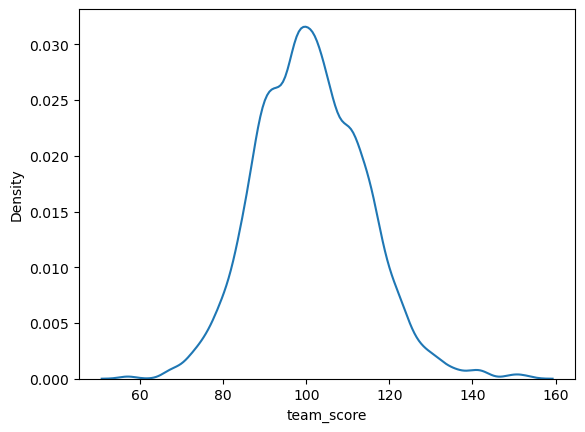

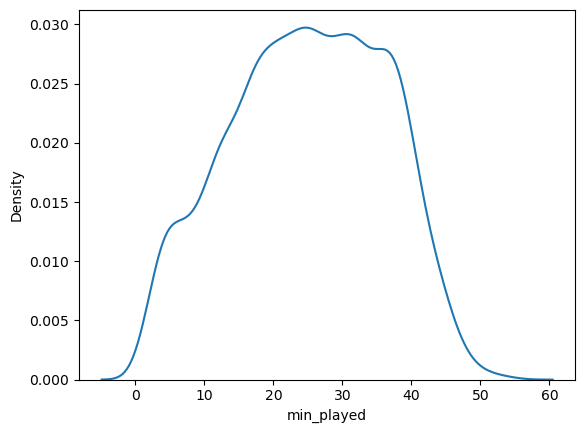

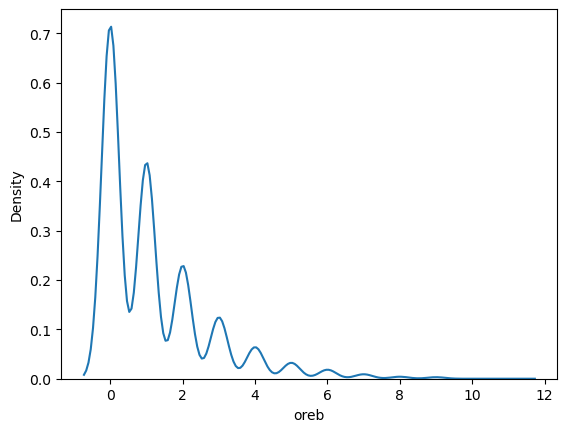

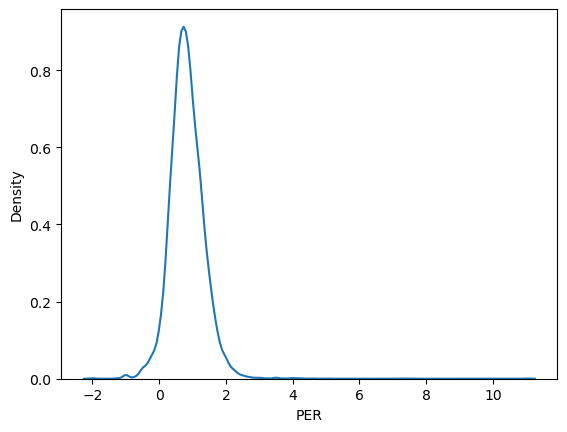

In [203]:
# Import the Seaborn library for data visualization
import seaborn as sns

# Iterate through each column in the 'stats' DataFrame
for col in stats.columns:
    # Create a new figure and axis for each column
    fig, ax = plt.subplots()
    
    # Generate a kernel density plot (KDE) for the current column using Seaborn
    sns.kdeplot(stats[col], ax=ax)


In [204]:
X = stats.drop('PER', 1)
y = stats['PER']

C:\Users\Owner\AppData\Local\Temp\ipykernel_11360\3347691264.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = stats.drop('PER', 1)


In [205]:
X

ast  blk  dreb  fg3a  fg3m  fga  fgm  fta  ftm  pf  pts  reb  stl  \
0       4    0     1     2     0    4    1    4    4   2    6    1    0   
1       4    0     2     0     0    6    3    2    1   5    7    2    3   
2       2    1     4     6     1   13    5    2    2   1   13    5    0   
3       5    2    17     0     0   17    6    6    3   2   15   21    4   
4       2    0     4     0     0    2    1    4    3   2    5    9    0   
...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ..  ...  ...  ...   
8885    0    0     2     1     1    3    1    2    2   3    5    2    0   
8886    2    0     1     0     0    4    3    0    0   1    6    1    0   
8887    3    1     9     6     2   20    9    4    3   3   23   14    0   
8888    0    0     0     0     0    1    0    0    0   0    0    1    0   
8889    0    0     0     0     0    1    1    0    0   0    2    1    0   

      turnover  team_score  min_played  oreb  
0            1          91       16.85     0  
1            2         105       36.00     0  
2            2          88       29.20     1  
3            3          87       39.00     4  
4            0          90       28.00     5  
...        ...         ...         ...   ...  
8885         0         109       11.00     0  
8886         0         104       11.00     0  
8887         3         108       44.00     5  
8888         0          90        5.00     1  
8889         0          94        8.00     1  

[8890 rows x 17 columns]

In [206]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 

In [207]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [208]:
data = stats.copy()

In [209]:
data.columns

Index(['ast', 'blk', 'dreb', 'fg3a', 'fg3m', 'fga', 'fgm', 'fta', 'ftm', 'pf',
       'pts', 'reb', 'stl', 'turnover', 'team_score', 'min_played', 'oreb',
       'PER'],
      dtype='object')

In [210]:
len(data.columns)

18

In [211]:
# Standardize the feature matrix X using StandardScaler
stand = StandardScaler()
x_scaler = stand.fit_transform(X)

# Split the standardized data into training and testing sets
# Set random_state for reproducibility and use a 50% test size
X_train, X_test, Y_train, Y_test = train_test_split(x_scaler, y, random_state=100, test_size=0.5)


Complete Features

In [212]:
# Define a dictionary containing different hyperparameter values for tuning.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object for tuning a DecisionTreeRegressor.
# This will search for the best combination of hyperparameters using cross-validation.
random_search6 = RandomizedSearchCV(DecisionTreeRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to the training data (X_train, Y_train).
random_search6.fit(X_train, Y_train)

# Get the best estimator (model) found by RandomizedSearchCV after tuning.
tuned_gdr1 = random_search6.best_estimator_

In [213]:
# Calculate and print the mean squared error (MSE) between the true Y_test and predicted values.
mse = mean_squared_error(Y_test, random_search6.predict(X_test))
print("Mean Squared Error:", mse)

# Calculate and print the root mean squared error (RMSE), which is the square root of MSE.
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate and print the R-squared (R2) score, a measure of model performance.
r2 = r2_score(Y_test, random_search6.predict(X_test))
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.09278339943414489
Root Mean Squared Error: 0.30460367600235044
R-squared (R2) Score: 0.687007018918611


In [214]:
# Calculate and print the score (often accuracy or a similar metric) of the model on the test data.
test_score = random_search6.score(X_test, Y_test)
print("Model Score on Test Data:", test_score)

# Calculate and print the score of the model on the training data.
train_score = random_search6.score(X_train, Y_train)
print("Model Score on Training Data:", train_score)

Model Score on Test Data: 0.687007018918611
Model Score on Training Data: 0.7958914673266768


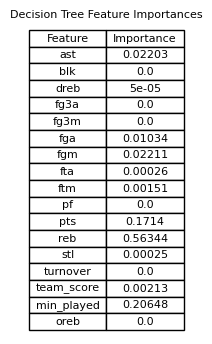

In [215]:
# Calculate feature importances from the tuned Decision Tree Regressor model.
importances = tuned_gdr1.feature_importances_

# Get the names of the features.
feature_names = X.columns

# Create a DataFrame to store feature names and their respective importances.
df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})

# Create a figure and axis for displaying the table of feature importances.
fig, ax = plt.subplots(figsize=(2, 4))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis to display the feature names and importances.
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Decision Tree Feature Importances', fontsize=8)

# Show the table.
plt.show()


In [216]:
# Define a dictionary containing different hyperparameter values for tuning.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object for tuning a Random Forest Regressor.
# This will search for the best combination of hyperparameters using cross-validation.
random_search4 = RandomizedSearchCV(RandomForestRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to the training data (X_train, Y_train).
random_search4.fit(X_train, Y_train)

# Get the best estimator (model) found by RandomizedSearchCV after tuning.
tuned_gdr2 = random_search4.best_estimator_


In [217]:
# Calculate and print the mean squared error (MSE) between the true Y_test and predicted values.
mse = mean_squared_error(Y_test, random_search4.predict(X_test))
print("Mean Squared Error:", mse)

# Calculate and print the root mean squared error (RMSE), which is the square root of MSE.
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate and print the R-squared (R2) score, a measure of model performance.
r2 = r2_score(Y_test, random_search4.predict(X_test))
print("R-squared (R2) Score:", r2)


Mean Squared Error: 0.08124817428368468
Root Mean Squared Error: 0.2850406537385232
R-squared (R2) Score: 0.7259196318354308


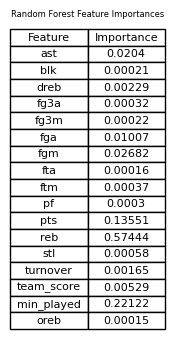

In [218]:
# Calculate feature importances from the tuned Random Forest Regressor model.
importances = tuned_gdr2.feature_importances_

# Get the names of the features.
feature_names = X.columns

# Create a DataFrame to store feature names and their respective importances.
df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})

# Create a figure and axis for displaying the table of feature importances.
fig, ax = plt.subplots(figsize=(2, 4))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis to display the feature names and importances.
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Random Forest Feature Importances', fontsize=6)

# Save the table as an image (e.g., in PNG format).
plt.savefig('rbr.png')

# Display the table as an image.
plt.show()


In [219]:
# Define a dictionary containing different hyperparameter values for tuning.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object for tuning a GradientBoostingRegressor.
# This will search for the best combination of hyperparameters using cross-validation.
random_search5 = RandomizedSearchCV(GradientBoostingRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to the training data (X_train, Y_train).
random_search5.fit(X_train, Y_train)

# Get the best estimator (model) found by RandomizedSearchCV after tuning.
tuned_gdr4 = random_search5.best_estimator_


In [220]:
# Calculate and print the mean squared error (MSE) between the true Y_test and predicted values.
mse = mean_squared_error(Y_test, random_search5.predict(X_test))
print("Mean Squared Error:", mse)

# Calculate and print the root mean squared error (RMSE), which is the square root of MSE.
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate and print the R-squared (R2) score, a measure of model performance.
r2 = r2_score(Y_test, random_search5.predict(X_test))
print("R-squared (R2) Score:", r2)


Mean Squared Error: 0.0364344128563487
Root Mean Squared Error: 0.1908780051665165
R-squared (R2) Score: 0.8770931485221911


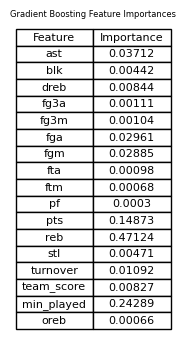

In [221]:
# Calculate feature importances from the tuned GradientBoostingRegressor model.
importances = tuned_gdr4.feature_importances_

# Get the names of the features.
feature_names = X.columns

# Create a DataFrame to store feature names and their respective importances.
df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})

# Create a figure and axis for displaying the table of feature importances.
fig, ax = plt.subplots(figsize=(2, 4))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis to display the feature names and importances.
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Gradient Boosting Feature Importances', fontsize=6)

# Save the table as an image (e.g., in PNG format).
plt.savefig('gbr.png')

# Display the table as an image.
plt.show()


In [222]:
name = []
mse = []
rmse = []
r2_sco = []
training = []

In [223]:
# Append the model name 'Decision_Tree' to the 'name' list.
name.append('Decision_Tree')

# Calculate the Mean Squared Error (MSE) between true 'Y_test' and predicted values,
# round the result to 4 decimal places, and append it to the 'mse' list.
mse.append(np.round(mean_squared_error(Y_test, random_search6.predict(X_test)), 4))

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE,
# round the result to 4 decimal places, and append it to the 'rmse' list.
rmse.append(np.round(np.sqrt(mean_squared_error(Y_test, random_search6.predict(X_test))), 4))

# Calculate the R-squared (R2) score, which measures model goodness of fit,
# round the result to 4 decimal places, and append it to the 'r2_sco' list.
r2_sco.append(np.round(r2_score(Y_test, random_search6.predict(X_test)), 4))

# Calculate the model score on the training data,
# round the result to 4 decimal places, and append it to the 'training' list.
training.append(np.round(random_search6.score(X_train, Y_train), 4))


In [224]:
# Append the model name 'Random_Forest' to the 'name' list.
name.append('Random_Forest')

# Calculate the Mean Squared Error (MSE) between true 'Y_test' and predicted values
# using the Random Forest model, round the result to 4 decimal places, and append it to the 'mse' list.
mse.append(np.round(mean_squared_error(Y_test, random_search4.predict(X_test)), 4))

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE,
# round the result to 4 decimal places, and append it to the 'rmse' list.
rmse.append(np.round(np.sqrt(mean_squared_error(Y_test, random_search4.predict(X_test))), 4))

# Calculate the R-squared (R2) score, which measures model goodness of fit,
# using the Random Forest model, round the result to 4 decimal places, and append it to the 'r2_sco' list.
r2_sco.append(np.round(r2_score(Y_test, random_search4.predict(X_test)), 4))

# Calculate the model score on the training data using the Random Forest model,
# round the result to 4 decimal places, and append it to the 'training' list.
training.append(np.round(random_search4.score(X_train, Y_train), 4))


In [225]:
# Append the model name 'Gradient_Boosting' to the 'name' list.
name.append('Gradient_Boosting')

# Calculate the Mean Squared Error (MSE) between true 'Y_test' and predicted values
# using the Gradient Boosting model, round the result to 4 decimal places, and append it to the 'mse' list.
mse.append(np.round(mean_squared_error(Y_test, random_search5.predict(X_test)), 4))

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE,
# round the result to 4 decimal places, and append it to the 'rmse' list.
rmse.append(np.round(np.sqrt(mean_squared_error(Y_test, random_search5.predict(X_test))), 4))

# Calculate the R-squared (R2) score, which measures model goodness of fit,
# using the Gradient Boosting model, round the result to 4 decimal places, and append it to the 'r2_sco' list.
r2_sco.append(np.round(r2_score(Y_test, random_search5.predict(X_test)), 4))

# Calculate the model score on the training data using the Gradient Boosting model,
# round the result to 4 decimal places, and append it to the 'training' list.
training.append(np.round(random_search5.score(X_train, Y_train), 4))


In [226]:
r2_sco

[0.687, 0.7259, 0.8771]

In [227]:
# Create a pandas DataFrame 'first_score' to store model performance metrics.
first_score = pd.DataFrame({
    'model_name': name,  # Column containing the names of the models.
    'mse': mse,          # Column containing Mean Squared Error values.
    'rmse': rmse,        # Column containing Root Mean Squared Error values.
    'r2_score': r2_sco,  # Column containing R-squared (R2) score values.
    'training': training  # Column containing model scores on training data.
})


In [228]:
first_score.head()

model_name     mse    rmse  r2_score  training
0      Decision_Tree  0.0928  0.3046    0.6870    0.7959
1      Random_Forest  0.0812  0.2850    0.7259    0.8232
2  Gradient_Boosting  0.0364  0.1909    0.8771    0.9672

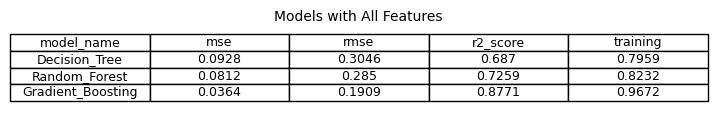

In [229]:
# Create a figure and axis for displaying the table with specified dimensions.
fig, ax = plt.subplots(figsize=(9, 1))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis using data from the 'first_score' DataFrame.
ax.table(cellText=first_score.values, colLabels=first_score.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Models with All Features', fontsize=10)

# Save the table as an image.
plt.savefig('table_1.png')

# Display the table as an image.
plt.show()


In [230]:
# Reshape the 'first_score' DataFrame using the melt function.
com_feat = first_score.melt(
    id_vars='model_name',  # Column(s) to keep as identifiers.
    value_vars=['mse', 'rmse', 'r2_score', 'training'],  # Columns to pivot.
    var_name='metrics',   # New column name for the pivoted columns.
    value_name='score'    # New column name for the values.
)


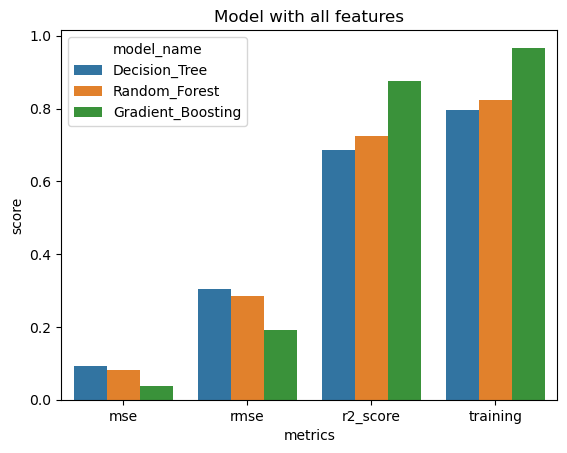

In [231]:
# Create a bar plot using Seaborn, specifying 'metrics' for x-axis, 'score' for y-axis, and 'model_name' for hue.
sns.barplot(x='metrics', y='score', data=com_feat, hue='model_name')

# Set the title for the plot.
plt.title('Model with all features')

# Save the plot as an image (e.g., in PNG format).
plt.savefig('Initial_Model_Evaluation_1.png')


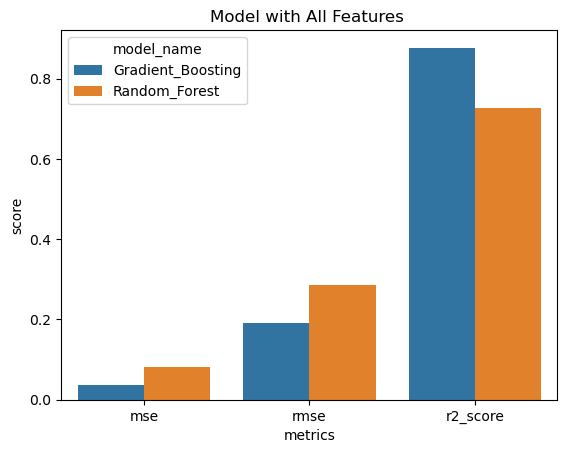

In [232]:
# Find the top two models with the largest 'r2_score' and 'training' values, and reset the index.
dou = first_score.nlargest(2, columns=['r2_score', 'training']).reset_index()

# Reshape the 'dou' DataFrame using the melt function.
com_feat = dou.melt(
    id_vars='model_name',  # Column(s) to keep as identifiers.
    value_vars=['mse', 'rmse', 'r2_score'],  # Columns to pivot.
    var_name='metrics',  # New column name for the pivoted columns.
    value_name='score'  # New column name for the values.
)

# Create a bar plot using Seaborn, specifying 'metrics' for x-axis, 'score' for y-axis, and 'model_name' for hue.
sns.barplot(x='metrics', y='score', data=com_feat, hue='model_name')

# Set the title for the plot.
plt.title('Model with All Features ')

# Save the plot as an image (e.g., in PNG format).
plt.savefig('Intial Top Model Evaluation_1.png')


In [233]:
dou.drop('index', 1, inplace = True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_11360\3706118206.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dou.drop('index', 1, inplace = True)


In [234]:
dou.head()

model_name     mse    rmse  r2_score  training
0  Gradient_Boosting  0.0364  0.1909    0.8771    0.9672
1      Random_Forest  0.0812  0.2850    0.7259    0.8232

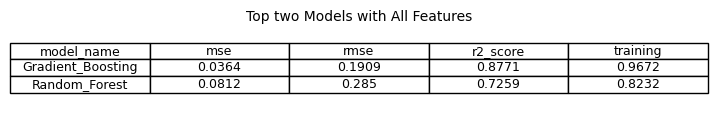

In [235]:
# Create a figure and axis for displaying the table with specified dimensions.
fig, ax = plt.subplots(figsize=(9, 1))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis using data from the 'dou' DataFrame.
ax.table(cellText=dou.values, colLabels=dou.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Top two Models with All Features', fontsize=10)

# Save the table as an image (e.g., in PNG format).
plt.savefig('table_2.png')

# Display the table as an image.
plt.show()


top 10 features 

In [236]:
new_name = []
new_mse = []
new_rmse = []
new_r2_score = []
new_training = []

In [237]:
tuned_gdr1

DecisionTreeRegressor(max_depth=14, max_leaf_nodes=3000, min_samples_leaf=20,
                      min_samples_split=40)

In [238]:
# Calculate feature importances from the tuned DecisionTreeRegressor model.
importances = tuned_gdr1.feature_importances_

# Get the names of the features.
feature_names = X.columns

# Create a DataFrame to store feature names and their respective importances.
df_1 = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})


In [239]:
# Get the names of the top 8 features with the largest importance values.
names = df_1.nlargest(n=8, columns='Importance').reset_index()['Feature']

# Convert the feature names to a NumPy array.
nam = np.array(names)

# Select only the columns (features) in the dataset that correspond to the selected feature names.
X_new = X[nam]

# Standardize (scale) the selected features using StandardScaler.
stand = StandardScaler()
X_new_scale = stand.fit_transform(X_new)

# Split the scaled dataset into training and testing sets.
X_ntrain, X_ntest, Y_ntrain, Y_ntest = train_test_split(X_new_scale, y, test_size=0.2)


In [240]:
# Define a dictionary containing different hyperparameter values for tuning.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object for tuning a DecisionTreeRegressor.
# This will search for the best combination of hyperparameters using cross-validation.
random = RandomizedSearchCV(DecisionTreeRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to the training data (X_ntrain, Y_ntrain).
random.fit(X_ntrain, Y_ntrain)

# Get the best estimator (model) found by RandomizedSearchCV after tuning.
decision = random.best_estimator_


In [241]:
# Calculate and print the Mean Squared Error (MSE) between the true Y_ntest and predicted values.
mse = mean_squared_error(Y_ntest, random.predict(X_ntest))
print("Mean Squared Error:", mse)

# Calculate and print the Root Mean Squared Error (RMSE), which is the square root of MSE.
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate and print the R-squared (R2) score, a measure of model performance.
r2 = r2_score(Y_ntest, random.predict(X_ntest))
print("R-squared (R2) Score:", r2)

# Calculate and print the model score on the training data.
training_score = random.score(X_ntrain, Y_ntrain)
print("Training Score:", training_score)


Mean Squared Error: 0.05698477668482211
Root Mean Squared Error: 0.23871484387197647
R-squared (R2) Score: 0.7643744913050641
Training Score: 0.7960642591854521


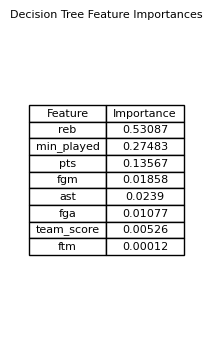

In [242]:
# Calculate feature importances from the DecisionTreeRegressor model.
importances = decision.feature_importances_

# Get the names of the features.
feature_names = X_new.columns

# Create a DataFrame to store feature names and their respective importances.
df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})

# Create a figure and axis for displaying the table with specified dimensions.
fig, ax = plt.subplots(figsize=(2, 4))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis to display the feature names and importances.
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Decision Tree Feature Importances', fontsize=8)

# Display the table as a figure.
plt.show()


In [243]:
# Append the model name 'Decision_Tree' to the 'new_name' list.
new_name.append('Decision_Tree')

# Calculate and append the Mean Squared Error (MSE) between true Y_ntest and predicted values to the 'new_mse' list.
new_mse.append(np.round(mean_squared_error(Y_ntest, random.predict(X_ntest)), 4))

# Calculate and append the Root Mean Squared Error (RMSE) to the 'new_rmse' list.
new_rmse.append(np.round(np.sqrt(mean_squared_error(Y_ntest, random.predict(X_ntest))), 4))

# Calculate and append the R-squared (R2) score to the 'new_r2_score' list.
new_r2_score.append(np.round(r2_score(Y_ntest, random.predict(X_ntest)), 4))

# Calculate and append the model score on the training data to the 'new_training' list.
new_training.append(np.round(random.score(X_ntrain, Y_ntrain), 4))


In [244]:
# Calculate feature importances from the tuned RandomForestRegressor model.
importances = tuned_gdr2.feature_importances_

# Get the names of the features.
feature_names = X.columns

# Create a DataFrame to store feature names and their respective importances.
df_2 = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})


In [245]:
# Get the names of the top 10 features with the largest importance values.
names_1 = df_2.nlargest(n=10, columns='Importance').reset_index()['Feature']

# Convert the feature names to a NumPy array.
nam = np.array(names_1)

# Select only the columns (features) in the dataset that correspond to the selected feature names.
X_new_1 = X[nam]

# Standardize (scale) the selected features using the previously created StandardScaler 'stand'.
X_new_scale_1 = stand.fit_transform(X_new_1)

# Split the scaled dataset into training and testing sets.
Z_ntrain, Z_ntest, Y_ntrain, Y_ntest = train_test_split(X_new_scale_1, y, test_size=0.2)


In [246]:
# Define a dictionary containing different hyperparameter values for tuning.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object for tuning a RandomForestRegressor.
# This will search for the best combination of hyperparameters using cross-validation.
random_1 = RandomizedSearchCV(RandomForestRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to the training data (Z_ntrain, Y_ntrain).
random_1.fit(Z_ntrain, Y_ntrain)

# Get the best estimator (model) found by RandomizedSearchCV after tuning.
forest = random_1.best_estimator_


In [247]:
# Calculate and print the Mean Squared Error (MSE) between the true Y_ntest and predicted values.
mse_rf = mean_squared_error(Y_ntest, forest.predict(Z_ntest))
print("Mean Squared Error:", mse_rf)

# Calculate and print the Root Mean Squared Error (RMSE), which is the square root of MSE.
rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error:", rmse_rf)

# Calculate and print the R-squared (R2) score, a measure of model performance.
r2_rf = r2_score(Y_ntest, forest.predict(Z_ntest))
print("R-squared (R2) Score:", r2_rf)

# Calculate and print the model score on the training data.
training_score_rf = random_1.score(Z_ntrain, Y_ntrain)
print("Training Score:", training_score_rf)


Mean Squared Error: 0.05558990442669601
Root Mean Squared Error: 0.2357751140953939
R-squared (R2) Score: 0.793881405531632
Training Score: 0.821259652110035


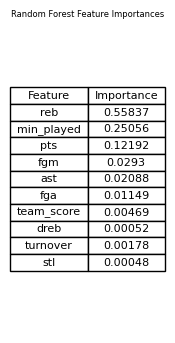

In [248]:
# Calculate feature importances from the RandomForestRegressor model.
importances = forest.feature_importances_

# Get the names of the features.
feature_names = X_new_1.columns

# Create a DataFrame to store feature names and their respective importances.
df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})

# Create a figure and axis for displaying the table with specified dimensions.
fig, ax = plt.subplots(figsize=(2, 4))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis to display the feature names and importances.
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Random Forest Feature Importances', fontsize=6)

# Save the table as an image (e.g., in PNG format).
plt.savefig('rbr.png')

# Display the table as a figure.
plt.show()


In [249]:
# Append the model name 'Random_Forest' to the 'new_name' list.
new_name.append('Random_Forest')

# Calculate and append the Mean Squared Error (MSE) between true Y_ntest and predicted values to the 'new_mse' list.
new_mse.append(np.round(mean_squared_error(Y_ntest, random_1.predict(Z_ntest)), 4))

# Calculate and append the Root Mean Squared Error (RMSE) to the 'new_rmse' list.
new_rmse.append(np.round(np.sqrt(mean_squared_error(Y_ntest, random_1.predict(Z_ntest))), 4))

# Calculate and append the R-squared (R2) score to the 'new_r2_score' list.
new_r2_score.append(np.round(r2_score(Y_ntest, random_1.predict(Z_ntest)), 4))

# Calculate and append the model score on the training data to the 'new_training' list.
new_training.append(np.round(random_1.score(Z_ntrain, Y_ntrain), 4))


In [250]:
new_r2_score

[0.7644, 0.7939]

In [251]:
# Calculate feature importances from the tuned GradientBoostingRegressor model.
importances = tuned_gdr4.feature_importances_

# Get the names of the features.
feature_names = X.columns

# Create a DataFrame to store feature names and their respective importances.
df_3 = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})


In [252]:
# Get the names of the top 10 features with the largest importance values.
names_2 = df_3.nlargest(n=10, columns='Importance').reset_index()['Feature']

# Convert the feature names to a NumPy array.
nam = np.array(names_2)

# Select only the columns (features) in the dataset that correspond to the selected feature names.
X_new_2 = X[nam]

# Standardize (scale) the selected features using the previously created StandardScaler 'stand'.
X_new_scale_2 = stand.fit_transform(X_new_2)

# Split the scaled dataset into training and testing sets.
A_ntrain, A_ntest, Y_ntrain, Y_ntest = train_test_split(X_new_scale_2, y, test_size=0.2)


In [253]:
# Define a dictionary containing different hyperparameter values for tuning.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object for tuning a GradientBoostingRegressor.
# This will search for the best combination of hyperparameters using cross-validation.
random_2 = RandomizedSearchCV(GradientBoostingRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to the training data (A_ntrain, Y_ntrain).
random_2.fit(A_ntrain, Y_ntrain)

# Get the best estimator (model) found by RandomizedSearchCV after tuning.
boost = random_2.best_estimator_


In [254]:
# Calculate and print the Mean Squared Error (MSE) between the true Y_ntest and predicted values.
mse_gb = mean_squared_error(Y_ntest, boost.predict(A_ntest))
print("Mean Squared Error:", mse_gb)

# Calculate and print the Root Mean Squared Error (RMSE), which is the square root of MSE.
rmse_gb = np.sqrt(mse_gb)
print("Root Mean Squared Error:", rmse_gb)

# Calculate and print the R-squared (R2) score, a measure of model performance.
r2_gb = r2_score(Y_ntest, boost.predict(A_ntest))
print("R-squared (R2) Score:", r2_gb)

# Calculate and print the model score on the training data.
training_score_gb = random_2.score(A_ntrain, Y_ntrain)
print("Training Score:", training_score_gb)


Mean Squared Error: 0.01670137950666969
Root Mean Squared Error: 0.12923381719453192
R-squared (R2) Score: 0.9343523722725229
Training Score: 0.9569513016238143


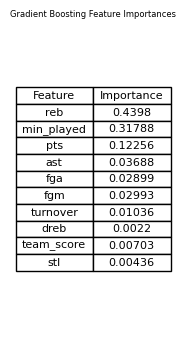

In [255]:
# Calculate feature importances from the tuned GradientBoostingRegressor model.
importances = boost.feature_importances_

# Get the names of the features.
feature_names = X_new_2.columns

# Create a DataFrame to store feature names and their respective importances.
df = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})

# Save the feature importances to a CSV file.
df.to_csv('gb_feat.csv', index=True)

# Create a figure and axis for displaying the table with specified dimensions.
fig, ax = plt.subplots(figsize=(2, 4))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis to display the feature names and importances.
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Gradient Boosting Feature Importances', fontsize=6)

# Save the table as an image (e.g., in PNG format).
plt.savefig('gbr.png')

# Display the table as a figure.
plt.show()


In [256]:
# Append the model name 'Gradient_Boosting' to the 'new_name' list.
new_name.append('Gradient_Boosting')

# Calculate and append the Mean Squared Error (MSE) between true Y_ntest and predicted values to the 'new_mse' list.
new_mse.append(np.round(mean_squared_error(Y_ntest, random_2.predict(A_ntest)), 4))

# Calculate and append the Root Mean Squared Error (RMSE) to the 'new_rmse' list.
new_rmse.append(np.round(np.sqrt(mean_squared_error(Y_ntest, random_2.predict(A_ntest))), 4))

# Calculate and append the R-squared (R2) score to the 'new_r2_score' list.
new_r2_score.append(np.round(r2_score(Y_ntest, random_2.predict(A_ntest)), 4))

# Calculate and append the model score on the training data to the 'new_training' list.
new_training.append(np.round(random_2.score(A_ntrain, Y_ntrain), 4))


In [257]:
new_r2_score

[0.7644, 0.7939, 0.9344]

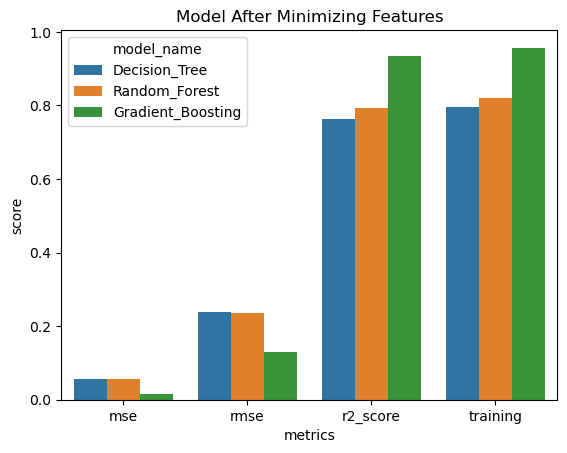

In [258]:
# Create a DataFrame 'second_score' to store performance metrics for different models.
second_score = pd.DataFrame({
    'model_name': new_name,
    'mse': new_mse,
    'rmse': new_rmse,
    'r2_score': new_r2_score,
    'training': new_training
})

# Melt the 'second_score' DataFrame to a long format ('df_mod') for visualization.
df_mod = second_score.melt(id_vars='model_name', value_vars=['mse', 'rmse', 'r2_score', 'training'],
                           var_name='metrics', value_name='score')

# Create a barplot to visualize the metrics, grouped by model_name.
sns.barplot(x='metrics', y='score', data=df_mod, hue='model_name')

# Set the title for the barplot.
plt.title('Model After Minimizing Features')

# Save the barplot as an image.
plt.savefig('Final Model Evaluation_1.png')


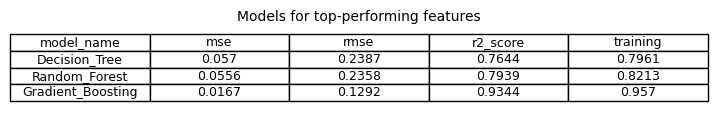

In [259]:
# Create a figure and axis for displaying the table with specified dimensions.
fig, ax = plt.subplots(figsize=(9, 1))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis to display the performance metrics.
ax.table(cellText=second_score.values, colLabels=second_score.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Models for top-performing features', fontsize=10)

# Save the table as an image (e.g., in PNG format).
plt.savefig('table_3.png')

# Display the table as a figure.
plt.show()


In [260]:
# third_score = pd.DataFrame({
#     'model_name': new_name, 
#     'mse': new_mse, 
#     'rmse' : new_rmse, 
#     'r2_score' : new_r2_score, 
#     'training' : new_training
# })

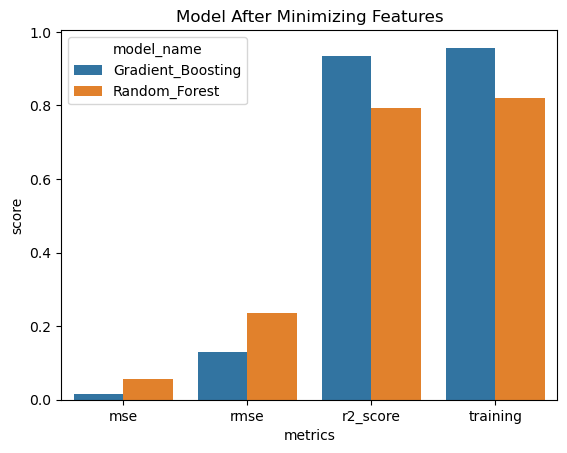

In [261]:
# Select the top two models based on R-squared and training score.
thor = second_score.nlargest(2, columns=['r2_score', 'training']).reset_index()

# Melt the 'thor' DataFrame into a long format ('new_mod_3') for visualization.
new_mod_3 = thor.melt(id_vars='model_name', value_vars=['mse', 'rmse', 'r2_score', 'training'],
                      var_name='metrics', value_name='score')

# Create a barplot to visualize the metrics for the top two models.
sns.barplot(x='metrics', y='score', data=new_mod_3, hue='model_name')

# Set the title for the barplot.
plt.title('Model After Minimizing Features')

# Save the barplot as an image.
plt.savefig('Final Top Model Evaluation_2.png')


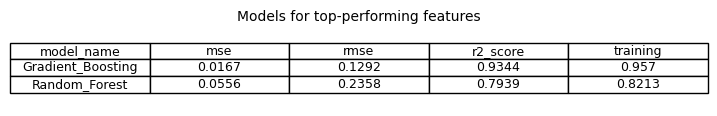

In [262]:
# Drop the 'index' column from the 'thor' DataFrame.
thor.drop('index', axis=1, inplace=True)

# Create a figure and axis for displaying the table with specified dimensions.
fig, ax = plt.subplots(figsize=(9, 1))

# Set the axis properties to make it look like a table.
ax.axis('tight')
ax.axis('off')

# Create a table within the axis to display the performance metrics.
ax.table(cellText=thor.values, colLabels=thor.columns, cellLoc='center', loc='center')

# Set the title for the table.
plt.title('Models for top-performing features', fontsize=10)

# Save the table as an image (e.g., in PNG format).
plt.savefig('table_4.png')

# Display the table as a figure.
plt.show()


# New set of data

In [263]:
# Read data from the CSV file 'deployment.csv' into a DataFrame.
data = pd.read_csv('deployment.csv')

In [264]:
data.head()

ast  blk  dreb  fg3a  fg3m  fg_pct  fga  fgm  fta  ftm  ...  \
0    1    0     2     3     0   0.286    7    2    0    0  ...   
1    3    1     2     0     0   0.667    3    2    0    0  ...   
2    4    0     3     0     0   0.538   13    7    3    2  ...   
3    3    0     1     4     2   0.400   15    6    5    5  ...   
4    2    0     2     2     1   0.429    7    3    0    0  ...   

   visitor_team_score  season  player_id  team_id  team_score  min_played  \
0                 117    2008       1091       26          96   17.000000   
1                 103    2014       1599        2          95   22.433333   
2                  88    2015        451        2          98   29.050000   
3                 112    2016       2160        3          86   28.550000   
4                 107    2017        223       28         107   26.516667   

        eFG%        TS%  oreb       PER  
0  28.571429  28.571429     0  0.382353  
1  66.666667  66.666667     0  0.646360  
2  53.846154  55.865922     0  0.826162  
3  46.666667  55.232558     0  0.577933  
4  50.000000  50.000000     0  0.414833  

[5 rows x 30 columns]

In [265]:
# Drop multiple columns from the 'data' DataFrame.
data.drop(['eFG%', 'TS%', 'visitor_team_id', 'home_team_id', \
            'game_id', 'player_id', 'team_id', 'season', 'home_team_score',
       'visitor_team_score', 'fg_pct', 'id'], 1, inplace = True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_11360\3200422373.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['eFG%', 'TS%', 'visitor_team_id', 'home_team_id', \


In [266]:
data.head()

ast  blk  dreb  fg3a  fg3m  fga  fgm  fta  ftm  pf  pts  reb  stl  \
0    1    0     2     3     0    7    2    0    0   1    4    2    0   
1    3    1     2     0     0    3    2    0    0   0    4    2    0   
2    4    0     3     0     0   13    7    3    2   3   16    3    1   
3    3    0     1     4     2   15    6    5    5   4   19    1    0   
4    2    0     2     2     1    7    3    0    0   4    7    2    0   

   turnover  team_score  min_played  oreb       PER  
0         0          96   17.000000     0  0.382353  
1         0          95   22.433333     0  0.646360  
2         1          98   29.050000     0  0.826162  
3         1          86   28.550000     0  0.577933  
4         1         107   26.516667     0  0.414833

In [267]:
# Extract the 'PER' column as the target variable 'Y_tar'.
Y_tar = data['PER']

In [268]:
# Create the feature matrix X_feat by dropping the 'PER' column from the 'data' DataFrame.
X_feat = data.drop('PER', axis=1)

# Standardize the features using a StandardScaler.
X_feat_stand = stand.fit_transform(X_feat)

# Split the data into training and testing sets.
# B_train and C_train are the training features and target, respectively.
# B_test and C_test are the testing features and target, respectively.
B_train, B_test, C_train, C_test = train_test_split(X_feat_stand, Y_tar, test_size=0.2)


The complete features

In [269]:
name_1 = []
mse_1 = []
rmse_1 = []
r2_score_1 = []

In [270]:
# Define a dictionary containing a range of hyperparameter values to search over.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object to search for the best hyperparameters for a DecisionTreeRegressor.
random_search9 = RandomizedSearchCV(DecisionTreeRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to your training data to find the best hyperparameters.
random_search9.fit(B_train, C_train)

# Get the best estimator (model) found during the hyperparameter search.
search1 = random_search9.best_estimator_


In [271]:
# Append the model name 'Decision_Tree' to the 'name_1' list.
name_1.append('Decision_Tree')

# Calculate and append the Mean Squared Error (MSE) between true C_test and predicted values to the 'mse_1' list.
mse_1.append(np.round(mean_squared_error(C_test, random_search9.predict(B_test)), 4))

# Calculate and append the Root Mean Squared Error (RMSE) to the 'rmse_1' list.
rmse_1.append(np.round(np.sqrt(mean_squared_error(C_test, random_search9.predict(B_test))), 4))

# Calculate and append the R-squared (R2) score to the 'r2_score_1' list.
r2_score_1.append(np.round(r2_score(C_test, random_search9.predict(B_test)), 4))


In [272]:
# Define a dictionary containing a range of hyperparameter values to search over.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object to search for the best hyperparameters for a RandomForestRegressor.
random_search8 = RandomizedSearchCV(RandomForestRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to your training data to find the best hyperparameters.
random_search8.fit(B_train, C_train)

# Get the best estimator (model) found during the hyperparameter search.
search2 = random_search8.best_estimator_


In [273]:
# Append the model name 'Random_Forest' to the 'name_1' list.
name_1.append('Random_Forest')

# Calculate and append the Mean Squared Error (MSE) between true C_test and predicted values to the 'mse_1' list.
mse_1.append(np.round(mean_squared_error(C_test, random_search8.predict(B_test)), 4))

# Calculate and append the Root Mean Squared Error (RMSE) to the 'rmse_1' list.
rmse_1.append(np.round(np.sqrt(mean_squared_error(C_test, random_search8.predict(B_test))), 4))

# Calculate and append the R-squared (R2) score to the 'r2_score_1' list.
r2_score_1.append(np.round(r2_score(C_test, random_search8.predict(B_test)), 4))


In [274]:
# Define a dictionary containing a range of hyperparameter values to search over.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object to search for the best hyperparameters for a GradientBoostingRegressor.
random_search7 = RandomizedSearchCV(GradientBoostingRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to your training data to find the best hyperparameters.
random_search7.fit(B_train, C_train)

# Get the best estimator (model) found during the hyperparameter search.
search3 = random_search7.best_estimator_


In [275]:
# Append the model name 'Gradient_Boosting' to the 'name_1' list.
name_1.append('Gradient_Boosting')

# Calculate and append the Mean Squared Error (MSE) between true C_test and predicted values to the 'mse_1' list.
mse_1.append(np.round(mean_squared_error(C_test, random_search7.predict(B_test)), 4))

# Calculate and append the Root Mean Squared Error (RMSE) to the 'rmse_1' list.
rmse_1.append(np.round(np.sqrt(mean_squared_error(C_test, random_search7.predict(B_test))), 4))

# Calculate and append the R-squared (R2) score to the 'r2_score_1' list.
r2_score_1.append(np.round(r2_score(C_test, random_search7.predict(B_test)), 4))


In [276]:
# Create a DataFrame 'new_feat_score_2' to store model performance metrics.
new_feat_score_2 = pd.DataFrame({
    'model_name': name_1,  # Model names are stored in the 'name_1' list.
    'mse': mse_1,          # Mean Squared Error (MSE) values are stored in the 'mse_1' list.
    'rmse': rmse_1,        # Root Mean Squared Error (RMSE) values are stored in the 'rmse_1' list.
    'r2_score': r2_score_1 # R-squared (R2) scores are stored in the 'r2_score_1' list.
})


In [277]:
new_feat_score_2.head()

model_name     mse    rmse  r2_score
0      Decision_Tree  0.0737  0.2715    0.7447
1      Random_Forest  0.0610  0.2470    0.7888
2  Gradient_Boosting  0.0207  0.1440    0.9282

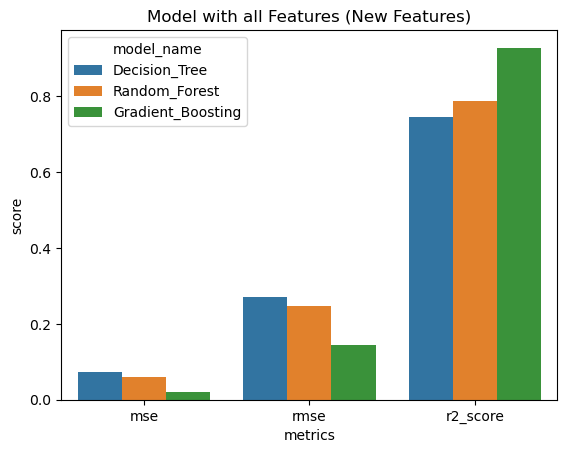

In [278]:
# Melt the 'new_feat_score_2' DataFrame to create a more compact representation.
mod = new_feat_score_2.melt(
    id_vars='model_name',
    value_vars=['mse', 'rmse', 'r2_score'],
    var_name='metrics',
    value_name='score'
)

# Create a bar plot using seaborn to visualize the metrics for different models.
sns.barplot(x='metrics', y='score', data=mod, hue='model_name')

# Set the title for the plot.
plt.title('Model with all Features (New Features)')

# Save the plot as an image file.
plt.savefig('Model_Evaluation_3.png')


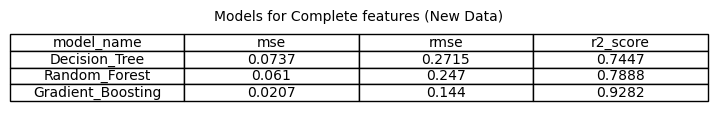

In [279]:
# Create a figure and axis for the table.
fig, ax = plt.subplots(figsize=(9, 1))
ax.axis('tight')
ax.axis('off')

# Create a table visualization with cell text, column labels, and center alignment.
ax.table(
    cellText=new_feat_score_2.values,  # Use the values from the 'new_feat_score_2' DataFrame.
    colLabels=new_feat_score_2.columns,  # Set column labels based on DataFrame columns.
    cellLoc='center',
    loc='center'
)

# Set the title for the table.
plt.title('Models for Complete features (New Data)', fontsize=10)

# Save the table as an image file.
plt.savefig('table_5.png')

# Show the table.
plt.show()


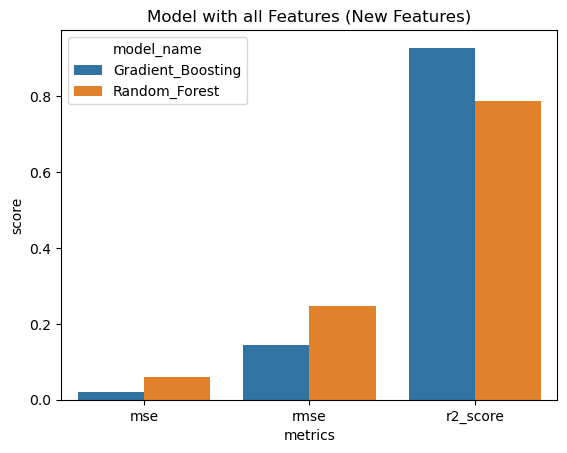

In [280]:
# Select the top two models with the highest R-squared (R2) scores.
dou = new_feat_score_2.nlargest(2, columns=['r2_score']).reset_index()

# Melt the DataFrame for visualization.
mod_1 = dou.melt(
    id_vars='model_name',
    value_vars=['mse', 'rmse', 'r2_score'],
    var_name='metrics',
    value_name='score'
)

# Create a bar plot using seaborn to visualize the metrics for the top two models.
sns.barplot(x='metrics', y='score', data=mod_1, hue='model_name')

# Set the title for the plot.
plt.title('Model with all Features (New Features)')

# Save the plot as an image file.
plt.savefig('New_features Top Model Evaluation_6.png')


C:\Users\Owner\AppData\Local\Temp\ipykernel_11360\3121429483.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dou.drop('index', 1, inplace=True)


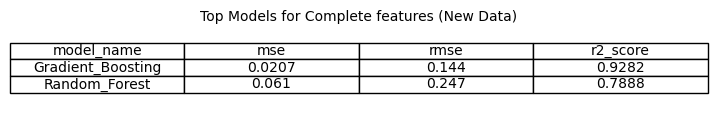

In [281]:
# Drop the 'index' column from the DataFrame.
dou.drop('index', 1, inplace=True)

# Create a figure and axis for the table.
fig, ax = plt.subplots(figsize=(9, 1))
ax.axis('tight')
ax.axis('off')

# Create a table visualization with cell text, column labels, and center alignment.
ax.table(
    cellText=dou.values,  # Use the values from the 'dou' DataFrame.
    colLabels=dou.columns,  # Set column labels based on DataFrame columns.
    cellLoc='center',
    loc='center'
)

# Set the title for the table.
plt.title('Top Models for Complete features (New Data)', fontsize=10)

# Save the table as an image file.
plt.savefig('table_6.png')

# Show the table.
plt.show()


Top 10 performing Features

Decision Tree

In [282]:
new_name_1 = []
new_mse_1 = []
new_rmse_1 = []
new_r2_score_1 = []

In [283]:
# Get feature importances from the 'search1' (Decision Tree) model.
importances = search1.feature_importances_

# Get the names of all features in the original dataset.
feature_names = X_feat.columns

# Create a DataFrame to store feature names and their importances.
df_3 = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})

# Select the top 8 features with the highest importance values.
names_1 = df_3.nlargest(n=8, columns='Importance').reset_index()['Feature']

# Convert the selected feature names to a numpy array.
nam = np.array(names_1)

# Create a new DataFrame 'X_new_1' containing only the selected features.
X_new_1 = X_feat[nam]

# Standardize the selected features.
X_new_scale_1 = stand.fit_transform(X_new_1)

# Split the data into training and testing sets.
Z_ntrain, Z_ntest, Y_ntrain, Y_ntest = train_test_split(X_new_scale_1, Y_tar, test_size=0.2)


In [284]:
# Define a dictionary of hyperparameters for the Decision Tree Regressor.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object for hyperparameter tuning with 5-fold cross-validation.
random = RandomizedSearchCV(DecisionTreeRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV object to the training data.
random.fit(Z_ntrain, Y_ntrain)

# Get the best estimator (model) found during the hyperparameter search.
decision = random.best_estimator_


In [285]:
# Append model name 'Decision_Tree' to the list of names.
new_name_1.append('Decision_Tree')

# Calculate and append Mean Squared Error (MSE) to the list.
new_mse_1.append(np.round(mean_squared_error(Y_ntest, random.predict(Z_ntest)), 4))

# Calculate and append Root Mean Squared Error (RMSE) to the list.
new_rmse_1.append(np.round(np.sqrt(mean_squared_error(Y_ntest, random.predict(Z_ntest))), 4))

# Calculate and append R-squared (R2) score to the list.
new_r2_score_1.append(np.round(r2_score(Y_ntest, random.predict(Z_ntest)), 4))


In [286]:
# Get feature importances from the 'search2' (Random Forest) model.
importances = search2.feature_importances_

# Get the names of all features in the original dataset.
feature_names = X.columns

# Create a DataFrame to store feature names and their importances.
df_3 = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})

# Select the top 10 features with the highest importance values.
name_2 = df_3.nlargest(n=10, columns='Importance').reset_index()['Feature']

# Convert the selected feature names to a numpy array.
nam = np.array(name_2)

# Create a new DataFrame 'X_new_2' containing only the selected features.
X_new_2 = X_feat[nam]

# Standardize the selected features.
X_new_scale_2 = stand.fit_transform(X_new_2)

# Split the data into training and testing sets.
A_ntrain, A_ntest, Y_ntrain, Y_ntest = train_test_split(X_new_scale_2, Y_tar, test_size=0.2)


In [287]:
# Define a dictionary 'params_dist' containing the hyperparameter search space.
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create a RandomizedSearchCV object 'random_search8' to search for the best hyperparameters.
# It uses the RandomForestRegressor as the estimator and performs 5-fold cross-validation.
random_search8 = RandomizedSearchCV(RandomForestRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV to the training data to find the best hyperparameters.
random_search8.fit(A_ntrain, Y_ntrain)

# Get the best estimator (model) based on the hyperparameter search.
search2 = random_search8.best_estimator_


In [288]:
# Append the name of the model to the 'new_name_1' list.
new_name_1.append('Random_Forest')

# Calculate and append the Mean Squared Error (MSE) to the 'new_mse_1' list.
new_mse_1.append(np.round(mean_squared_error(Y_ntest, random_search8.predict(A_ntest)), 4))

# Calculate and append the Root Mean Squared Error (RMSE) to the 'new_rmse_1' list.
new_rmse_1.append(np.round(np.sqrt(mean_squared_error(Y_ntest, random_search8.predict(A_ntest))), 4))

# Calculate and append the R-squared (R2) score to the 'new_r2_score_1' list.
new_r2_score_1.append(np.round(r2_score(Y_ntest, random_search8.predict(A_ntest)), 4))


In [289]:
# Calculate feature importances for the Gradient Boosting model (search3)
importances = search3.feature_importances_

# Get the names of the features from the X_feat DataFrame
feature_names = X_feat.columns

# Create a DataFrame (df_3) to store feature names and their importance values
df_3 = pd.DataFrame({'Feature': feature_names, 'Importance': np.round(importances, 5)})

# Select the top 10 features based on their importance values and store their names in name_2
name_2 = df_3.nlargest(n=10, columns='Importance').reset_index()['Feature']

# Convert the selected feature names into a NumPy array
nam = np.array(name_2)

# Create a new DataFrame (X_new_2) containing only the selected top features from the original X_feat DataFrame
X_new_2 = X_feat[nam]

# Standardize the features in X_new_2 using StandardScaler and store the scaled features in X_new_scale_2
X_new_scale_2 = stand.fit_transform(X_new_2)

# Split the data into training and testing sets with a test size of 20%, resulting in A_ntrain, A_ntest, Y_ntrain, and Y_ntest
A_ntrain, A_ntest, Y_ntrain, Y_ntest = train_test_split(X_new_scale_2, Y_tar, test_size=0.2)


In [290]:
# Define a dictionary (params_dist) containing hyperparameter values to search over
params_dist = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'max_leaf_nodes': [1000, 2000, 3000],
    'min_samples_leaf': [20, 30, 40, 50],
    'min_samples_split': [30, 40, 50]
}

# Create an instance of RandomizedSearchCV with GradientBoostingRegressor as the estimator
# This will perform a randomized hyperparameter search with 5-fold cross-validation
random_11 = RandomizedSearchCV(GradientBoostingRegressor(), params_dist, cv=5)

# Fit the RandomizedSearchCV model to the training data (A_ntrain, Y_ntrain)
random_11.fit(A_ntrain, Y_ntrain)

# Get the best estimator (model) from the random search
boost = random_11.best_estimator_


In [291]:
# Append the name of the model ('Gradient_Boosting') to the list 'new_name_1'
new_name_1.append('Gradient_Boosting')

# Calculate and round the Mean Squared Error (MSE) between the actual test labels (Y_ntest)
# and the predicted labels from the 'random_11' model, then append it to 'new_mse_1' list
new_mse_1.append(np.round(mean_squared_error(Y_ntest, random_11.predict(A_ntest)), 4))

# Calculate and round the Root Mean Squared Error (RMSE) between the actual test labels (Y_ntest)
# and the predicted labels from the 'random_11' model, then append it to 'new_rmse_1' list
new_rmse_1.append(np.round(np.sqrt(mean_squared_error(Y_ntest, random_11.predict(A_ntest))), 4))

# Calculate and round the R-squared (R2) score between the actual test labels (Y_ntest)
# and the predicted labels from the 'random_11' model, then append it to 'new_r2_score_1' list
new_r2_score_1.append(np.round(r2_score(Y_ntest, random_11.predict(A_ntest)), 4))


In [292]:
#Creating a dataframe of model evaluator  for my top performing featuresin my new data
new_feat_score = pd.DataFrame({
    'model_name': new_name_1, 
    'mse':new_mse_1, 
    'rmse' : new_rmse_1, 
    'r2_score' : new_r2_score_1
})

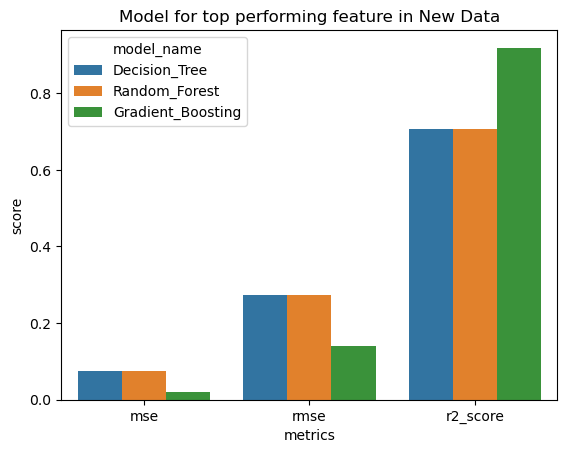

In [293]:
#Creating a bar plot  for my top performing feature of my new data
new_mod = new_feat_score.melt(id_vars = 'model_name', value_vars = ['mse', 'rmse', 'r2_score'],\
                var_name = 'metrics', value_name = 'score')
sns.barplot(x = 'metrics', y = 'score', data = new_mod, hue = 'model_name')
plt.title('Model for top performing feature in New Data')
plt.savefig('_Model_Evaluation.png')

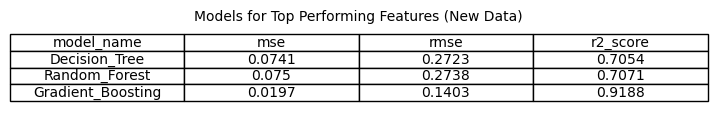

In [294]:
# Create a table visualization for model performance on top-performing features in new data
fig, ax = plt.subplots(figsize=(9, 1))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=new_feat_score.values, colLabels=new_feat_score.columns, cellLoc='center', loc='center')
plt.title('Models for Top Performing Features (New Data)', fontsize=10)
plt.savefig('table_7.png')  # Save the table visualization as an image
plt.show()  # Display the table visualization

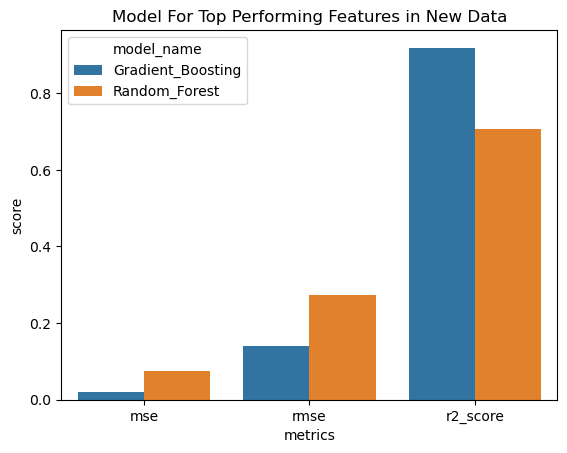

In [295]:
# Get the top 2 models with the highest R-squared scores
thor = new_feat_score.nlargest(2, columns=['r2_score']).reset_index()

# Create a melted DataFrame for visualization
new_mod_1 = thor.melt(id_vars='model_name', value_vars=['mse', 'rmse', 'r2_score'],
                      var_name='metrics', value_name='score')

# Create a barplot to visualize model performance
sns.barplot(x='metrics', y='score', data=new_mod_1, hue='model_name')
plt.title('Model For Top Performing Features in New Data')
plt.savefig('_Top Model Evaluation.png')


C:\Users\Owner\AppData\Local\Temp\ipykernel_11360\3345103705.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  thor.drop('index', 1, inplace=True)


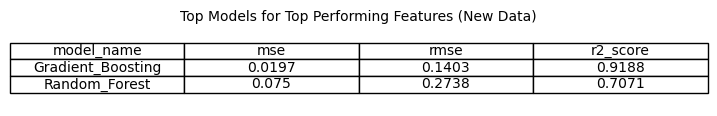

In [296]:
# Remove the 'index' column from the DataFrame
thor.drop('index', 1, inplace=True)

# Create a table visualization for the remaining data
fig, ax = plt.subplots(figsize=(9, 1))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=thor.values, colLabels=thor.columns, cellLoc='center', loc='center')
plt.title('Top Models for Top Performing Features (New Data)', fontsize=10)
plt.savefig('table_8.png')
plt.show()
